In [2]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os
import sys

sys.path.append("../..")

from blume.process import read, compute, plot_file
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

In [4]:
result = Results(varying_param="coupling", range=[0, 0.5, 1, 1.5, 2])
params = ModelParameters(model = "blume", var_range=(0.1, 1.75), step=0.001, tol=1e-9, max_steps=int(10e9), use_prev=True, chi=16)
result.get(params)

coupling=0:   0%|          | 0/1650 [00:00<?, ?it/s]

coupling=0: 100%|██████████| 1650/1650 [02:21<00:00, 11.67it/s]


Saving data in folder: '24-06 12:51'
Done 



coupling=0.5: 100%|██████████| 1650/1650 [02:10<00:00, 12.61it/s]


Saving data in folder: '24-06 12:51'
Done 



coupling=1: 100%|██████████| 1650/1650 [03:28<00:00,  7.91it/s]  


Saving data in folder: '24-06 12:51'
Done 



coupling=1.5: 100%|██████████| 1650/1650 [02:46<00:00,  9.92it/s]  


Saving data in folder: '24-06 12:51'
Done 



coupling=2: 100%|██████████| 1650/1650 [00:58<00:00, 28.27it/s]


Saving data in folder: '24-06 12:51'
Done 



In [4]:
# Make dir for saving the plots
dir = "16-05 12:11"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

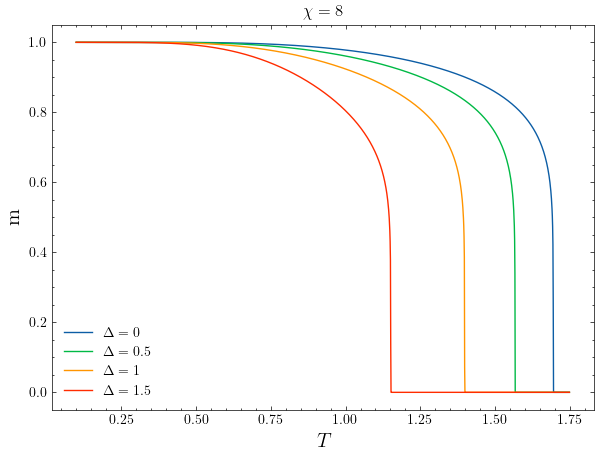

In [11]:
plt.figure(figsize=(7, 5))
T_range = (0, 3)
for delta in [0, 0.5, 1, 1.5]:
    line = plot_file(fn=f"coupling{delta}", range=T_range, prop=Prop.m, folder="24-06 12:51")
    line.set_label(rf"$\Delta = {delta}$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
#plt.ylim(0)
plt.title("$\chi = 8$")
plt.show()

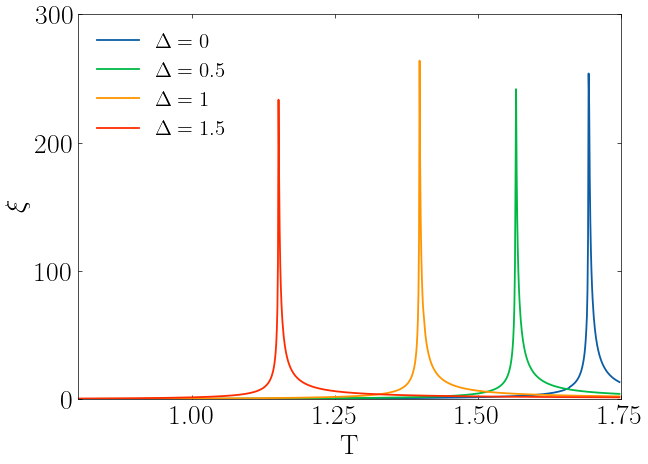

In [38]:
from matplotlib.ticker import MaxNLocator, FormatStrFormatter


plt.figure(figsize=(7, 5))
T_range = (0.1, 3)
for delta in [0, 0.5, 1, 1.5]:
    line = plot_file(fn=f"coupling{delta}", range=T_range, prop=Prop.xi, folder="24-06 12:51")
    line.set_label(rf"$\Delta = {delta}$")
    line.set_linewidth(1.3)

plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.minorticks_off()


plt.legend(prop = { "size": 15 }, loc = "upper left")


plt.xlim(0.8, 1.75)
plt.ylabel(r"$\xi$", fontsize=20)
plt.xlabel(r"$T$", fontsize=20)
plt.ylim(0, 300)
plt.show()

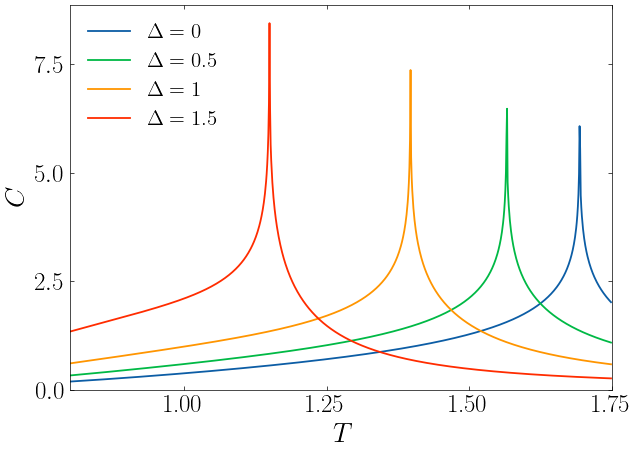

In [36]:
from matplotlib.ticker import MaxNLocator, FormatStrFormatter


plt.figure(figsize=(7, 5))


for delta in [0, 0.5, 1, 1.5]:
    data = read("24-06 12:51", f"coupling{delta}")
    energies = compute(Prop.Es, data)
    temps = data["temperatures"]
    heats = np.diff(energies) / np.diff(temps)
    plt.plot(temps[:-1], heats, label=f"$\Delta = {delta}$", linewidth = 1.3)


plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.minorticks_off()


plt.legend(prop = { "size": 15 }, loc = "upper left")

plt.ylim(0)
plt.xlim(0.8, 1.75)
plt.xlabel("$T$", fontsize=20)
plt.ylabel("$C$", fontsize=20)
plt.show()


In [11]:
result = Results(varying_param="chi", range=[2, 4, 8])
params = ModelParameters(model = "blume", T_range=(0.25, 1.75), step=0.001, tol=1e-9, max_steps=int(10e9), use_prev=True)
result.get(params)

chi=2: 100%|██████████| 1500/1500 [00:49<00:00, 30.29it/s]


Saving data in folder: '16-05 12:22'
Done 



chi=4: 100%|██████████| 1500/1500 [01:04<00:00, 23.10it/s]


Saving data in folder: '16-05 12:22'
Done 



chi=8: 100%|██████████| 1500/1500 [01:46<00:00, 14.09it/s]


Saving data in folder: '16-05 12:22'
Done 



In [12]:
# Make dir for saving the plots
dir = "16-05 12:22"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

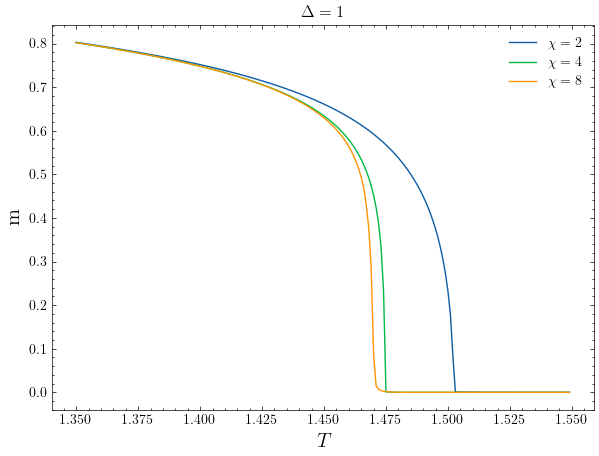

In [16]:
plt.figure(figsize=(7, 5))
T_range = (1.35, 1.55)
for chi in [2, 4, 8]:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.m, folder=dir)
    line.set_label(rf"$\chi = {chi}$")
plt.title("$\Delta = 1$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
#plt.ylim(0)
plt.savefig(f"{path_dir}/magnetizations")

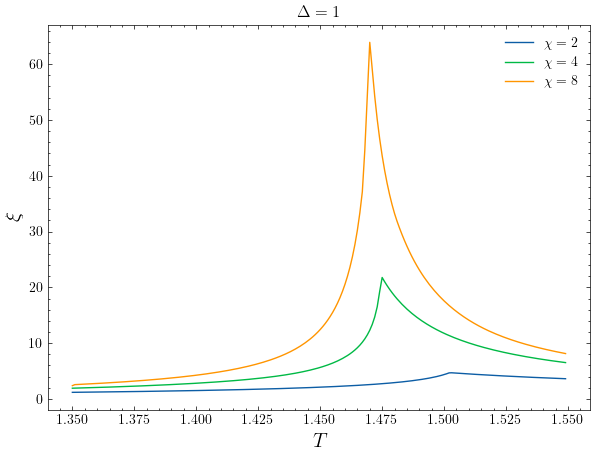

In [18]:
plt.figure(figsize=(7, 5))
T_range = (1.35, 1.55)
for chi in [2, 4, 8]:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.xi, folder=dir)
    line.set_label(rf"$\chi = {chi}$")
plt.title("$\Delta = 1$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\xi$", fontsize=15)
#plt.ylim(0)
plt.savefig(f"{path_dir}/magnetizations")

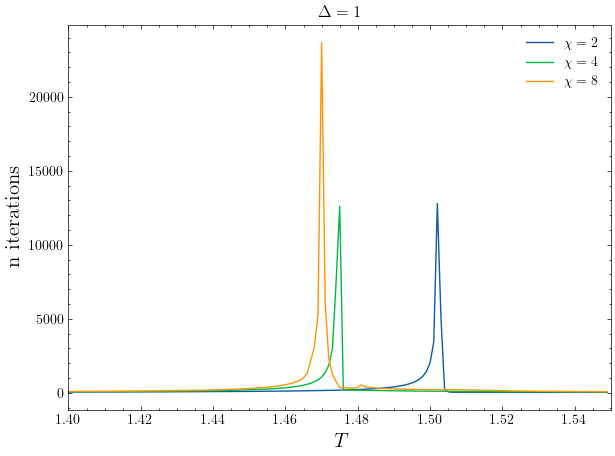

In [20]:
plt.figure(figsize=(7, 5))
T_range = (1.4, 1.55)
for chi in [2, 4, 8]:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop="number of iterations", folder=dir)
    line.set_label(rf"$\chi = {chi}$")
plt.title("$\Delta = 1$")
plt.legend()
plt.xlim(1.4, 1.55)
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"n iterations", fontsize=15)
#plt.ylim(0)
plt.savefig(f"{path_dir}/number of iterations")

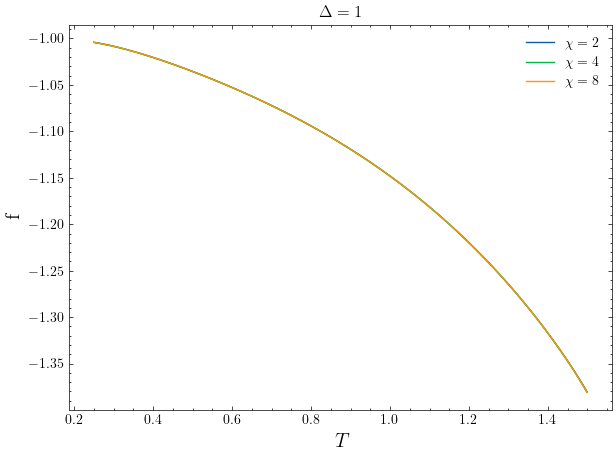

In [22]:
plt.figure(figsize=(7, 5))
T_range = (0.1, 1.5)
for chi in [2, 4, 8]:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.f, folder=dir)
    line.set_label(rf"$\chi = {chi}$")
plt.title("$\Delta = 1$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"f", fontsize=15)
#plt.ylim(0)
plt.savefig(f"{path_dir}/number of iterations")